The data for this dataset have been created using Python script written by Keith Galli. The original script has been modified to make data more specific and distributed. Overall, all generated data are created based on certain conditions such as seasoning, price, preferences etc. 

In [1]:
#-- import libraries--
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
import os

In [2]:
# -- remove any pandas warnings
warnings.filterwarnings('ignore')

#-- create variable 'pwd' (present working directory) for defining current working directory
pwd = os.getcwd()

#-- create an empty dataframe where will be all 12 datasets (12 months)
main_df = pd.DataFrame()

#-- using list comprehension get all files name that contain in a folder called 'data'
all_datasets = [file for file in os.listdir(pwd + '\\data')]

#-- variable for displaying total number of uploaded files using for loop
count = 0

#--read all csv files one by one and concatenate them to our main_df
for file in all_datasets:
    inner_df = pd.read_csv(pwd + '\\data\\' + file)
    main_df = pd.concat([main_df, inner_df])
    count += 1
print(f'---> The total number of uploaded files: {count}')
print(f'---> The dataset has {list(main_df.shape)[0]} rows and {list(main_df.shape)[1]} columns in total.')

---> The total number of uploaded files: 12
---> The dataset has 172996 rows and 6 columns in total.


In [3]:
all_datasets

['Sales_April_2021.csv',
 'Sales_August_2021.csv',
 'Sales_December_2021.csv',
 'Sales_February_2021.csv',
 'Sales_January_2021.csv',
 'Sales_July_2021.csv',
 'Sales_June_2021.csv',
 'Sales_March_2021.csv',
 'Sales_May_2021.csv',
 'Sales_November_2021.csv',
 'Sales_October_2021.csv',
 'Sales_September_2021.csv']

***

### I. Data Cleaning

In [4]:
#-- make a copy of our main dataset
df = main_df.copy()
df.head(2)

,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
0,174087,Screen Protector,1,15.49,04/02/21 18:56,"587 2nd St, Vancouver, BC R0K–R6W"
1,174088,Lightning Charging Cable,1,23.99,04/23/21 17:08,"350 Main St, St. Johns, NL A0C–A2B"


In [5]:
#-- find out how many rows don't have values
df.isna().sum()

Order ID            495
Product name        495
Order quantity      495
Price               495
Order date          495
Purchase Address    495
dtype: int64

In [6]:
#-- drop all rows that are completely empty
df.dropna(how='all', inplace=True)
df.isna().sum()

Order ID            0
Product name        0
Order quantity      0
Price               0
Order date          0
Purchase Address    0
dtype: int64

In [7]:
#-- out dataset still has corrupted rows that duplicate colum names which doesn't allow us 
#-- to convert the whole column to numeric datatype
df[df['Order ID'] == 'Order ID']

,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
45,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
58,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
614,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
1581,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
1861,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
...,...,...,...,...,...,...
10038,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
10142,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
10450,Order ID,Product name,Order quantity,Price,Order date,Purchase Address
10891,Order ID,Product name,Order quantity,Price,Order date,Purchase Address


In [8]:
#-- we can get rid of those columns just calling boolean mask with all values that do not contain 'Order ID'
df = df[df['Order ID'] != 'Order ID']

In [9]:
#-- check data types for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172182 entries, 0 to 11719
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          172182 non-null  object
 1   Product name      172182 non-null  object
 2   Order quantity    172182 non-null  object
 3   Price             172182 non-null  object
 4   Order date        172182 non-null  object
 5   Purchase Address  172182 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


In [10]:
#-- all values have object type of data (Python strings). Let's bring 'Order quantity' and 'Price' columns to numeric data type
df['Order quantity'] = pd.to_numeric(df['Order quantity'])
df['Price'] = pd.to_numeric(df['Price'])

In [11]:
#-- break 'Purchase address' and derive city and state names
df['City'] = df['Purchase Address'].str.split(',', expand=True)[1]
df['State'] = df['Purchase Address'].str.split(',',expand=True)[2].str.split(' ', expand=True)[1].str.strip()

In [12]:
#-- bring the 'Order date' column to datetime format
df['Order date'] = pd.to_datetime(df['Order date'])

#--create a new column with the exact purchasing month
df['Order month'] = df['Order date'].dt.month_name()
df.head(2)

,Order ID,Product name,Order quantity,Price,Order date,Purchase Address,City,State,Order month
0,174087,Screen Protector,1,15.49,2021-04-02 18:56:00,"587 2nd St, Vancouver, BC R0K–R6W",Vancouver,BC,April
1,174088,Lightning Charging Cable,1,23.99,2021-04-23 17:08:00,"350 Main St, St. Johns, NL A0C–A2B",St. Johns,NL,April


In [13]:
#-- calculate Revenue
df['Revenue'] = df['Order quantity'] * df['Price']
df.head(2)

,Order ID,Product name,Order quantity,Price,Order date,Purchase Address,City,State,Order month,Revenue
0,174087,Screen Protector,1,15.49,2021-04-02 18:56:00,"587 2nd St, Vancouver, BC R0K–R6W",Vancouver,BC,April,15.49
1,174088,Lightning Charging Cable,1,23.99,2021-04-23 17:08:00,"350 Main St, St. Johns, NL A0C–A2B",St. Johns,NL,April,23.99


In [14]:
#-- rename 'Order quantity' column
df.rename(columns={'Order quantity': 'Quantity'}, inplace=True)

#-- rearrange column positions and make 'Order Month' next to 'Order date'
df = df[['Order ID', 'Product name', 'Quantity', 'Price', 'Revenue', 'Order date', 'Order month', 'Purchase Address', 'City', 'State']]
df.head(2)

,Order ID,Product name,Quantity,Price,Revenue,Order date,Order month,Purchase Address,City,State
0,174087,Screen Protector,1,15.49,15.49,2021-04-02 18:56:00,April,"587 2nd St, Vancouver, BC R0K–R6W",Vancouver,BC
1,174088,Lightning Charging Cable,1,23.99,23.99,2021-04-23 17:08:00,April,"350 Main St, St. Johns, NL A0C–A2B",St. Johns,NL


***

### II. Data analysis

> 1. What's the top 10 products have generated the biggest amount of revenue in 2021?

In [15]:
#-- set timestamp column ('Order date') as an index
df.index = df['Order date']
top10_revenue = df['2021'].groupby('Product name').sum().sort_values(by='Revenue', ascending=False)['Revenue'].reset_index().iloc[:10]

#-- bring revenue number to milions
top10_revenue['Revenue in millions'] = round(top10_revenue['Revenue']/1_000_000,1)
top10_revenue

,Product name,Revenue,Revenue in millions
0,Apple iPhone 13 Pro Max,7800764.00,7.8
1,Asus ROG Phone 5,5846213.00,5.8
2,Asus VivoBook X478 laptop,5759040.00,5.8
3,Samsung Galaxy S22,5564252.96,5.6
4,Google Pixel Phone 7,4954599.00,5.0
5,27in Curve Monitor,4515809.26,4.5
6,Google ChromeBook A15,4405629.36,4.4
7,Samsung Galaxy Tab 8,3501948.50,3.5
8,ThinkPad IdeaPad 3 laptop,3271399.67,3.3
9,52in Wide Monitor,3157783.38,3.2


> 2. What's the top 10 products have been sold in 2021 year the most?

In [16]:
top10_products = df['2021'].groupby('Product name')['Quantity'].sum().sort_values(ascending=False).reset_index()
price_per_product = df['2021'].groupby('Price').sum().reset_index()
top10_products = top10_products.iloc[:10]
top10_products

,Product name,Quantity
0,USB-C Charging Cable,21209
1,Lightning Charging Cable,18535
2,Laptop holder,15067
3,Apple Airpods Pro 2 gen,12627
4,Screen Protector,11330
5,Xiaomi PowerBank 10000 mAh,9807
6,SQuality M8 Headphones,8908
7,Delve Sound Pro Wireless Headphones,8679
8,Samsung Galaxy S22,6704
9,Google Pixel Phone 7,6201


> 3. What's the revenue, the number of sold items and the average price of all products in 2021 by quarter?

In [17]:
revenue_by_quarter = df['Revenue'].resample('Q').agg(['sum','count', 'mean']).iloc[:-1].reset_index()
revenue_by_quarter.rename(columns={'sum':'Revenue', 'count': 'Quantity', 'mean': 'Average price'}, inplace=True)
revenue_by_quarter['Order date'] = revenue_by_quarter['Order date'].dt.to_period('Q')
revenue_by_quarter

,Order date,Revenue,Quantity,Average price
0,2021Q1,13305789.16,35220,377.790720
1,2021Q2,15373597.02,40713,377.609044
2,2021Q3,15829038.80,41446,381.919577
3,2021Q4,20831389.95,54755,380.447264


> 4. What's the revenue, the number of sold items and the average price of all products in 2021 by month?

In [18]:
revenue_by_month = df['2021']['Revenue'].resample('M').agg(['sum', 'mean']).reset_index()
revenue_by_month.rename(columns={'sum':'Revenue', 'mean': 'Average price'}, inplace=True)
revenue_by_month['Order date'] = revenue_by_month['Order date'].dt.month_name()
revenue_by_month

,Order date,Revenue,Average price
0,January,5956399.56,378.256148
1,February,3560893.22,379.585675
2,March,3788496.38,375.395995
3,April,4587921.39,375.105992
4,May,4175582.37,381.924666
5,June,6610093.26,376.664953
6,July,8046174.66,386.000224
7,August,3411485.79,381.683351
8,September,4371378.35,374.807369
9,October,1764354.90,379.105049


> 5. What's the total revenue in 2021 year and its distribution over quarters?

In [19]:
total_revenue_year = df['2021']['Revenue'].sum()
print(f'Total revenue in 2021 year is ${total_revenue_year/1_000_000:.1f} million.')
revenue_by_quarter['Revenue QOQ change'] = round(revenue_by_quarter['Revenue'].pct_change()*100, 2)
revenue_by_quarter['Revenue QOQ change'].fillna(0, inplace=True)
revenue_by_quarter['Revenue QOQ change'].astype('str')
revenue_by_quarter['Revenue QOQ change'] = revenue_by_quarter['Revenue QOQ change'].apply(lambda x: str(x) + ' %')
revenue_by_quarter

Total revenue in 2021 year is $65.3 million.


,Order date,Revenue,Quantity,Average price,Revenue QOQ change
0,2021Q1,13305789.16,35220,377.790720,0.0 %
1,2021Q2,15373597.02,40713,377.609044,15.54 %
2,2021Q3,15829038.80,41446,381.919577,2.96 %
3,2021Q4,20831389.95,54755,380.447264,31.6 %


> 6. What's the distribution of totally sold products in hours by day?

In [20]:
df['Hour'] = df['Order date'].dt.hour
sell_by_hour = df['2021'].groupby('Hour')['Quantity'].sum().reset_index()
sell_by_hour

,Hour,Quantity
0,0,3881
1,1,2226
2,2,1224
3,3,741
4,4,737
5,5,1158
6,6,2203
7,7,3870
8,8,5862
9,9,8338


> 7. What's the best month in terms of sold quantity?

In [21]:
best_month = df['2021']['Quantity'].resample('M').sum().reset_index()
best_month['Order date'] = best_month['Order date'].dt.month_name()
best_month

,Order date,Quantity
0,January,16038
1,February,9555
2,March,10299
3,April,12475
4,May,11173
5,June,17893
6,July,21207
7,August,9104
8,September,11893
9,October,4754


***

### III. Data vizualisation

> 1. Display the top 10 products that generated the biggest amount of revenue in 2021

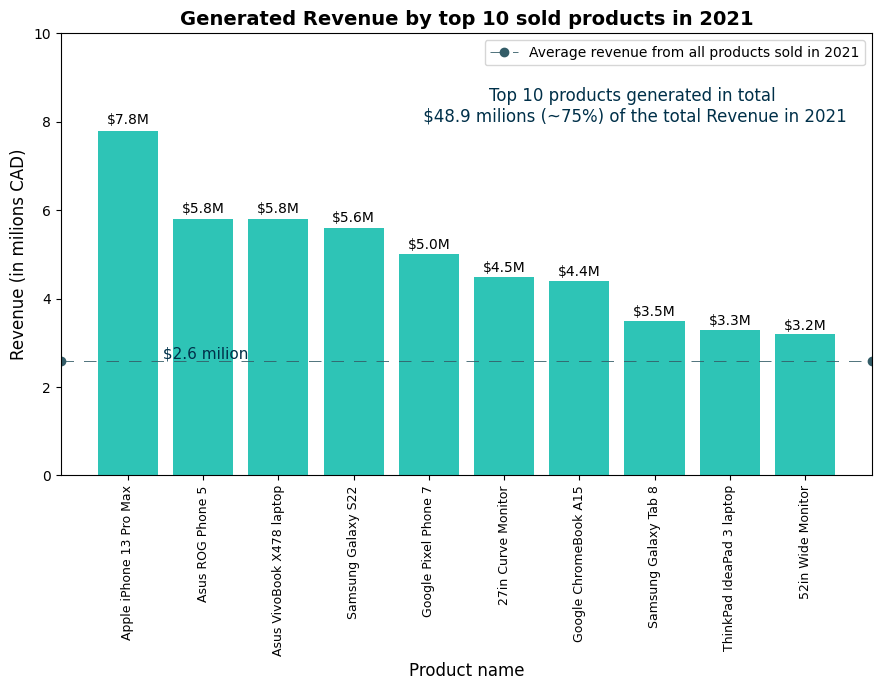

In [34]:
#-- values for a bar chart
fig, ax1 = plt.subplots(figsize=(9,7))
ax1.bar(top10_revenue['Product name'], top10_revenue['Revenue in millions'], color='#2ec4b6')

#-- add a horizontal line to display the average revenue from all goods sold in 2021
mean_product_revenue = round(df['2021'].groupby('Product name')['Revenue'].sum().mean()/1_000_000,1)
plt.axhline(mean_product_revenue, color='#335c67', label='Average revenue from all products sold in 2021',\
linewidth=0.6, marker='o', dashes=(15, 12))

#--add a label on the top of the bars
for index, data in enumerate(top10_revenue['Revenue in millions']):
    ax1.text(index, data*1.01, s=f'${data}M', horizontalalignment='center', verticalalignment='bottom', fontsize=10)

#-- add an annotation # 1 (right position)
label = ax1.annotate(f"Top 10 products generated in total\n ${top10_revenue['Revenue in millions'].sum()} milions (~75%) of the total Revenue in 2021",\
     color = '#003049', xy=(6.7, 8), fontsize=12, ha="center")

#-- add an annotation # 2 (left bottom position)
label2 = ax1.annotate(f" ${mean_product_revenue} milion", color = '#003049', xy=(1, 2.65), fontsize=11, ha="center")

ax1.set_title('Generated Revenue by top 10 sold products in 2021', fontsize = 14, weight='bold')
ax1.set_xlabel('Product name', fontsize=12)
ax1.set_ylabel('Revenue (in milions CAD)', fontsize=12)
ax1.ticklabel_format(axis = 'y', style='plain')
ax1.set_ylim([0,10])
plt.legend()
plt.xticks(fontsize=9, rotation='vertical')
plt.tight_layout()
plt.show()

Top 10 products sold in 2021 have generated $48.9 million or approximately 75% of the total revenue in 2021.
Each of the top 10 products have brought over $2.6 million (above the average revenue in 2021 year from all products).

> 2. Display the top 10 products that have been sold in 2021 year the most

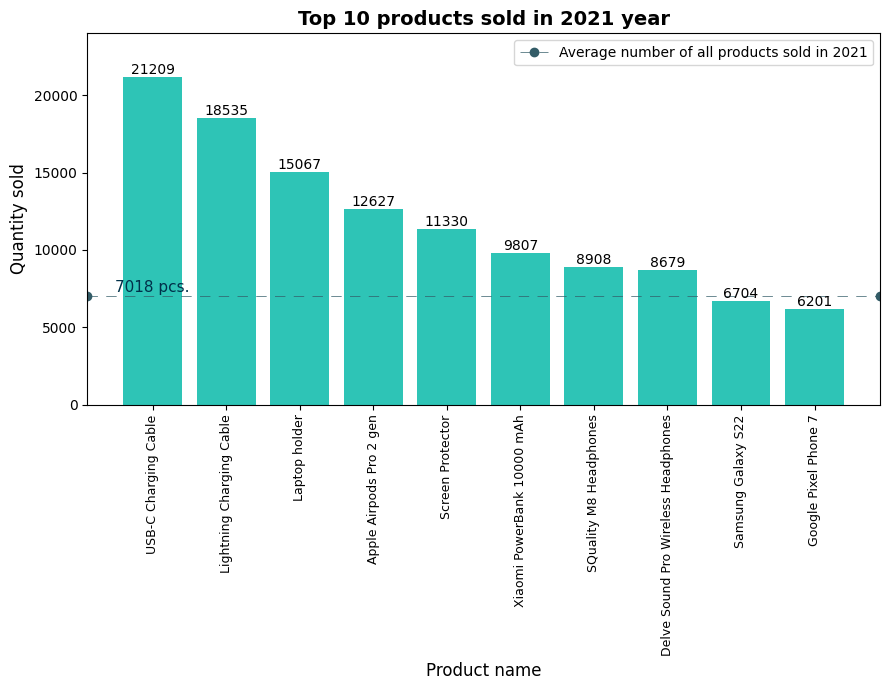

In [35]:
#-- values for a bar chart
fig, ax2 = plt.subplots(figsize=(9,7))
ax2.bar(top10_products['Product name'], top10_products['Quantity'], color='#2ec4b6')

#-- add a horizontal line to display average number of all goods sold in 2021
mean_selling = int(df['2021'].groupby('Product name')['Quantity'].sum().mean())
plt.axhline(mean_selling, color='#335c67', label='Average number of all products sold in 2021',\
 linewidth=0.5, marker='o', dashes=(15, 12))

#-- add an annotation about average number of all goods sold in 2021
label = ax2.annotate(f'{mean_selling} pcs.', color = '#003049', xy=(0, 7300), fontsize=11, ha="center")


#-- add labels on the top of the bars
for index, data in enumerate(top10_products['Quantity']):
    ax2.text(index, data, s=data, horizontalalignment='center', verticalalignment='bottom', fontsize=10)

ax2.set_title('Top 10 products sold in 2021 year', fontsize = 14, weight='bold')
ax2.set_xlabel('Product name', fontsize=12)
ax2.set_ylabel('Quantity sold', fontsize=12)
ax2.set_ylim([0,24000])
plt.legend()
plt.xticks(fontsize=9, rotation=90)
plt.tight_layout()
plt.show()

In [24]:

#-- find out how many products that generated the most revenue in 2021 year in 
#-- the list of the top 10 products that have been sold the most.
for product in list(top10_revenue['Product name']):
    if product in list(top10_products['Product name']):
        print(f'[+] {product} in the list of the top 10 sold products')
    else:
        print(f'-   {product} not in the list of the top 10 sold products')

-   Apple iPhone 13 Pro Max not in the list of the top 10 sold products
-   Asus ROG Phone 5 not in the list of the top 10 sold products
-   Asus VivoBook X478 laptop not in the list of the top 10 sold products
[+] Samsung Galaxy S22 in the list of the top 10 sold products
[+] Google Pixel Phone 7 in the list of the top 10 sold products
-   27in Curve Monitor not in the list of the top 10 sold products
-   Google ChromeBook A15 not in the list of the top 10 sold products
-   Samsung Galaxy Tab 8 not in the list of the top 10 sold products
-   ThinkPad IdeaPad 3 laptop not in the list of the top 10 sold products
-   52in Wide Monitor not in the list of the top 10 sold products


As we can see, only 2 products (or 20%) of the top 10 products that generated the most revenue in 2021 year in the list of the top 10 sold products. Which means that the higher a product price, the fewer it's been sold.

> 3. Display revenue and ordered quantity in 2021 by quarter

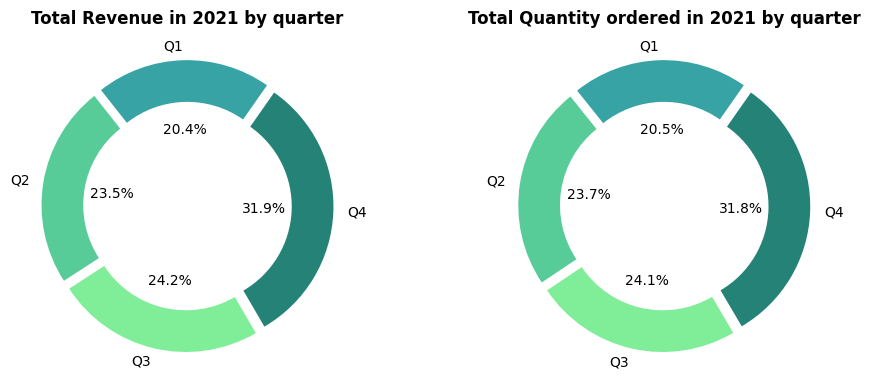

In [36]:
#-- parameters for pie charts
explode = (0.05, 0.05, 0.05, 0.05)
colors = ['#38a3a5', '#57cc99','#80ed99','#248277']
labels = ['Q1', 'Q2', 'Q3', 'Q4']


#-- left pie chart
fig, (ax3,ax4) = plt.subplots(ncols=2, nrows=1, figsize=(10,4), sharex=True, sharey=True)
ax3.pie(revenue_by_quarter['Revenue'], explode=explode, startangle=55, colors=colors, \
    labels=labels, autopct='%1.1f%%', pctdistance=0.5,wedgeprops=dict(width=.3))

#-- right pie chart
ax4.pie(revenue_by_quarter['Quantity'], explode=explode, startangle=55, colors=colors, \
    labels=labels, autopct='%1.1f%%', pctdistance=0.5, wedgeprops=dict(width=.3))

ax3.set_title('Total Revenue in 2021 by quarter', weight='bold')
ax4.set_title('Total Quantity ordered in 2021 by quarter', weight='bold')
plt.tight_layout()
plt.show()

In the 4th quarter the Company sold the most products (31,8%) and got the most revenue (31,9%) compare to other quarters. 

> 4. Display Revenue and Quantity sold in 2021 by month

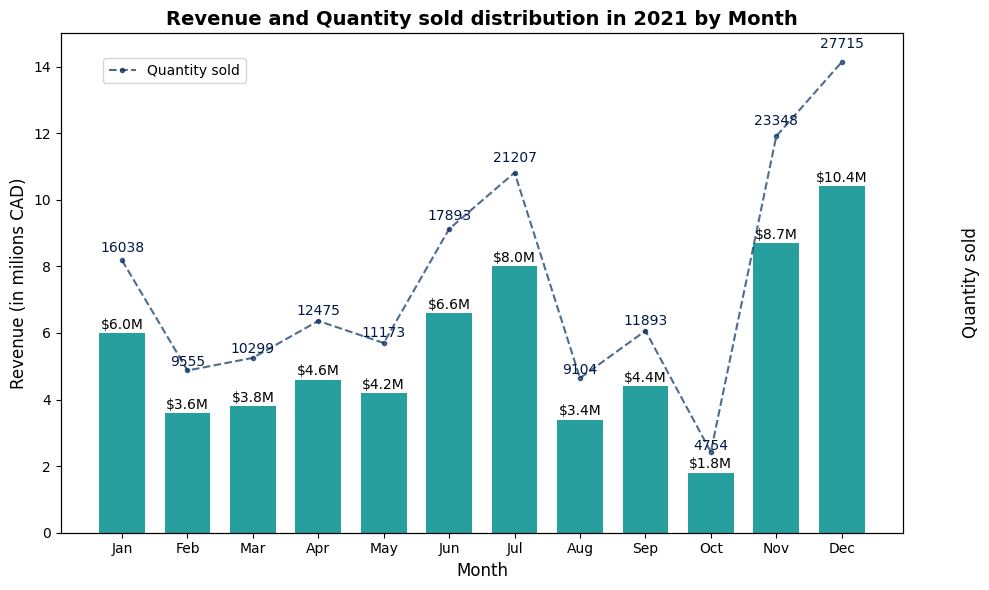

In [26]:
#-- values for combined bar and line plots
x_axis = revenue_by_month['Order date'].str[0:3]
y_axis = round(revenue_by_month['Revenue']/1_000_000,1)
y_axis2 = best_month['Quantity']

#-- create combined bar & line plot
fig, ax5 = plt.subplots(figsize=(10,6))
ax6 = ax5.twinx()
ax5.bar(x_axis,y_axis, color='#0e9594', width=0.7, alpha=0.9)
ax6.plot(x_axis, y_axis2*1.7, color='#052f5f', linestyle='dashed', marker='.', alpha=0.7, label='Quantity sold')

#-- add labels on the top of the bars
for index,data in enumerate(y_axis):
    ax5.text(index,data+0.25, s=f'${data}M', horizontalalignment='center', verticalalignment='center', fontsize=10)

#-- add labels on the top of the line dots
for index,data in enumerate(y_axis2):
    ax6.text(index,data*1.75, s=f'{data}', horizontalalignment='center', verticalalignment='baseline', fontsize=10, color='#001845')

ax5.set_title('Revenue and Quantity sold distribution in 2021 by Month', fontsize=14, weight='bold')
ax5.set_xlabel('Month', fontsize=12)
ax5.set_ylabel('Revenue (in milions CAD)', fontsize=12)
ax6.set_ylabel('Quantity sold', fontsize=12)

plt.style.use('default')
ax5.set_ylim([0,15])
ax6.set_ylim([0,50000])
ax6.tick_params(axis='y', colors='white')
plt.legend(loc=(0.05, 0.9))
plt.tight_layout()
plt.show()

In [27]:
#-- the graphic above also shows correlation between Revenue and Quantity sold during 2021 year.
price_per_product.corr()

,Price,Quantity,Revenue
Price,1.000000,-0.722414,0.535787
Quantity,-0.722414,1.000000,-0.241861
Revenue,0.535787,-0.241861,1.000000


The correlation shows that price has a negative effect on quantity. Which means, the higher the price, the fewer products the Company sells. 

> 5. Display the distribution of the total sold products in 2021 by hours

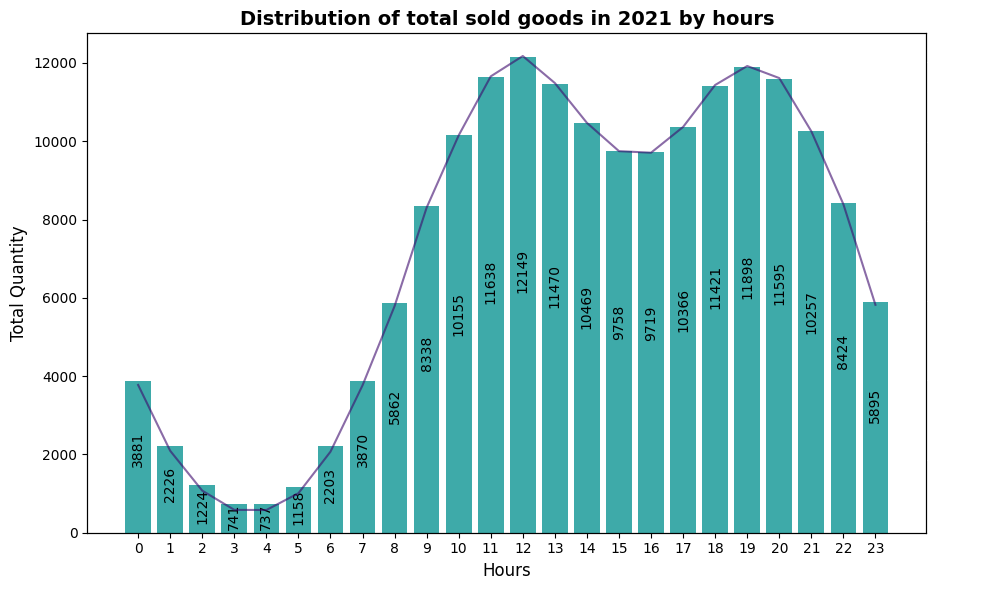

In [28]:
#-- values for a bar chart
hour = sell_by_hour['Hour']
quantity = sell_by_hour['Quantity']

fig, ax7 = plt.subplots(figsize=(10,6))
ax8 = ax7.twinx()
ax7.bar(hour,quantity, alpha=0.8, color='#0e9594')
ax8.plot(hour,quantity, color='#3c096c', alpha=0.6)

#-- add labels on the top of the line dots
for index, data in enumerate(quantity):
    ax7.text(index, data*0.55, s=data, horizontalalignment='center', verticalalignment='center', rotation=90)

plt.style.use('default')
ax7.set_title('Distribution of total sold goods in 2021 by hours', fontsize=14, weight='bold')
ax7.set_xlabel('Hours', fontsize=12)
ax7.set_ylabel('Total Quantity', fontsize=12)
ax7.set_xticks(hour)
ax8.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.show()

- The best selling time for the company is from 11AM to 2PM and from 6PM to 9PM.
- The worst selling time for the company is from 1AM to 7AM.

> 6. Display the distribution of quantity sold products in 2021 by month

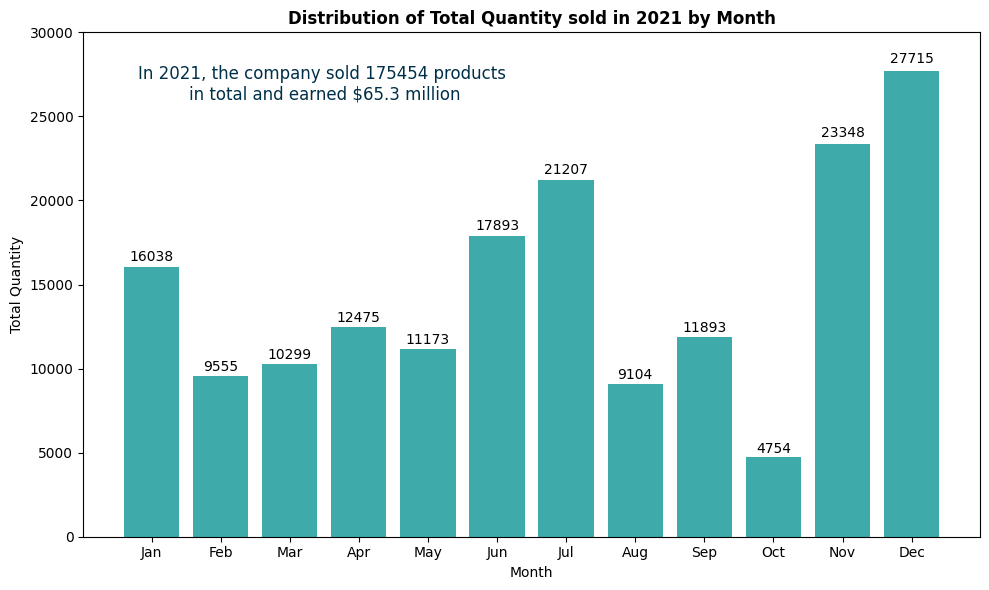

In [37]:
#-- values for a bar chart
date = best_month['Order date'].str[:3]
quantity = best_month['Quantity']
total_2021 = best_month['Quantity'].sum()

fig, ax9 = plt.subplots(figsize=(10,6))
ax9.bar(date,quantity, alpha=0.8, color='#0e9594')

#-- add labels on the top of the line dots
for index, data in enumerate(quantity):
    ax9.text(index, data*1.01, s=data, horizontalalignment='center', verticalalignment='bottom')

label = ax9.annotate(f'In 2021, the company sold {str(total_2021)} products \nin total and earned $65.3 million', color = '#003049',\
 xy=(2.5, 26000), fontsize=12, ha="center")

ax9.set_title('Distribution of Total Quantity sold in 2021 by Month', weight='bold')
ax9.set_xlabel('Month')
ax9.set_ylabel('Total Quantity')
ax9.set_xticks(date)
ax9.set_ylim([0,30000])
plt.tight_layout()
plt.show()

Top 3 the best months in terms of the quantity selling are:
- December
- November
- July

Top 3 the worst months in terms of the quantity selling are:
- October
- August
- February

> 7. Display the distribution of each product sold in 2021 by month separately

In [38]:
#-- make a cope of the original dataset
df_2 = df.copy()

In [39]:
#-- find out all top 10 sold product in 2021
products = list(top10_products['Product name'].iloc[:10])

#-- create an empty dictionary for placing all the products
d = {}

#-- create a variable for indexing each product in the 'products' list
k = 0

for product in products:
    d[k] = product
    k+= 1

for index, product in d.items():
    print(index, product)

0 USB-C Charging Cable
1 Lightning Charging Cable
2 Laptop holder
3 Apple Airpods Pro 2 gen
4 Screen Protector
5 Xiaomi PowerBank 10000 mAh
6 SQuality M8 Headphones
7 Delve Sound Pro Wireless Headphones
8 Samsung Galaxy S22
9 Google Pixel Phone 7


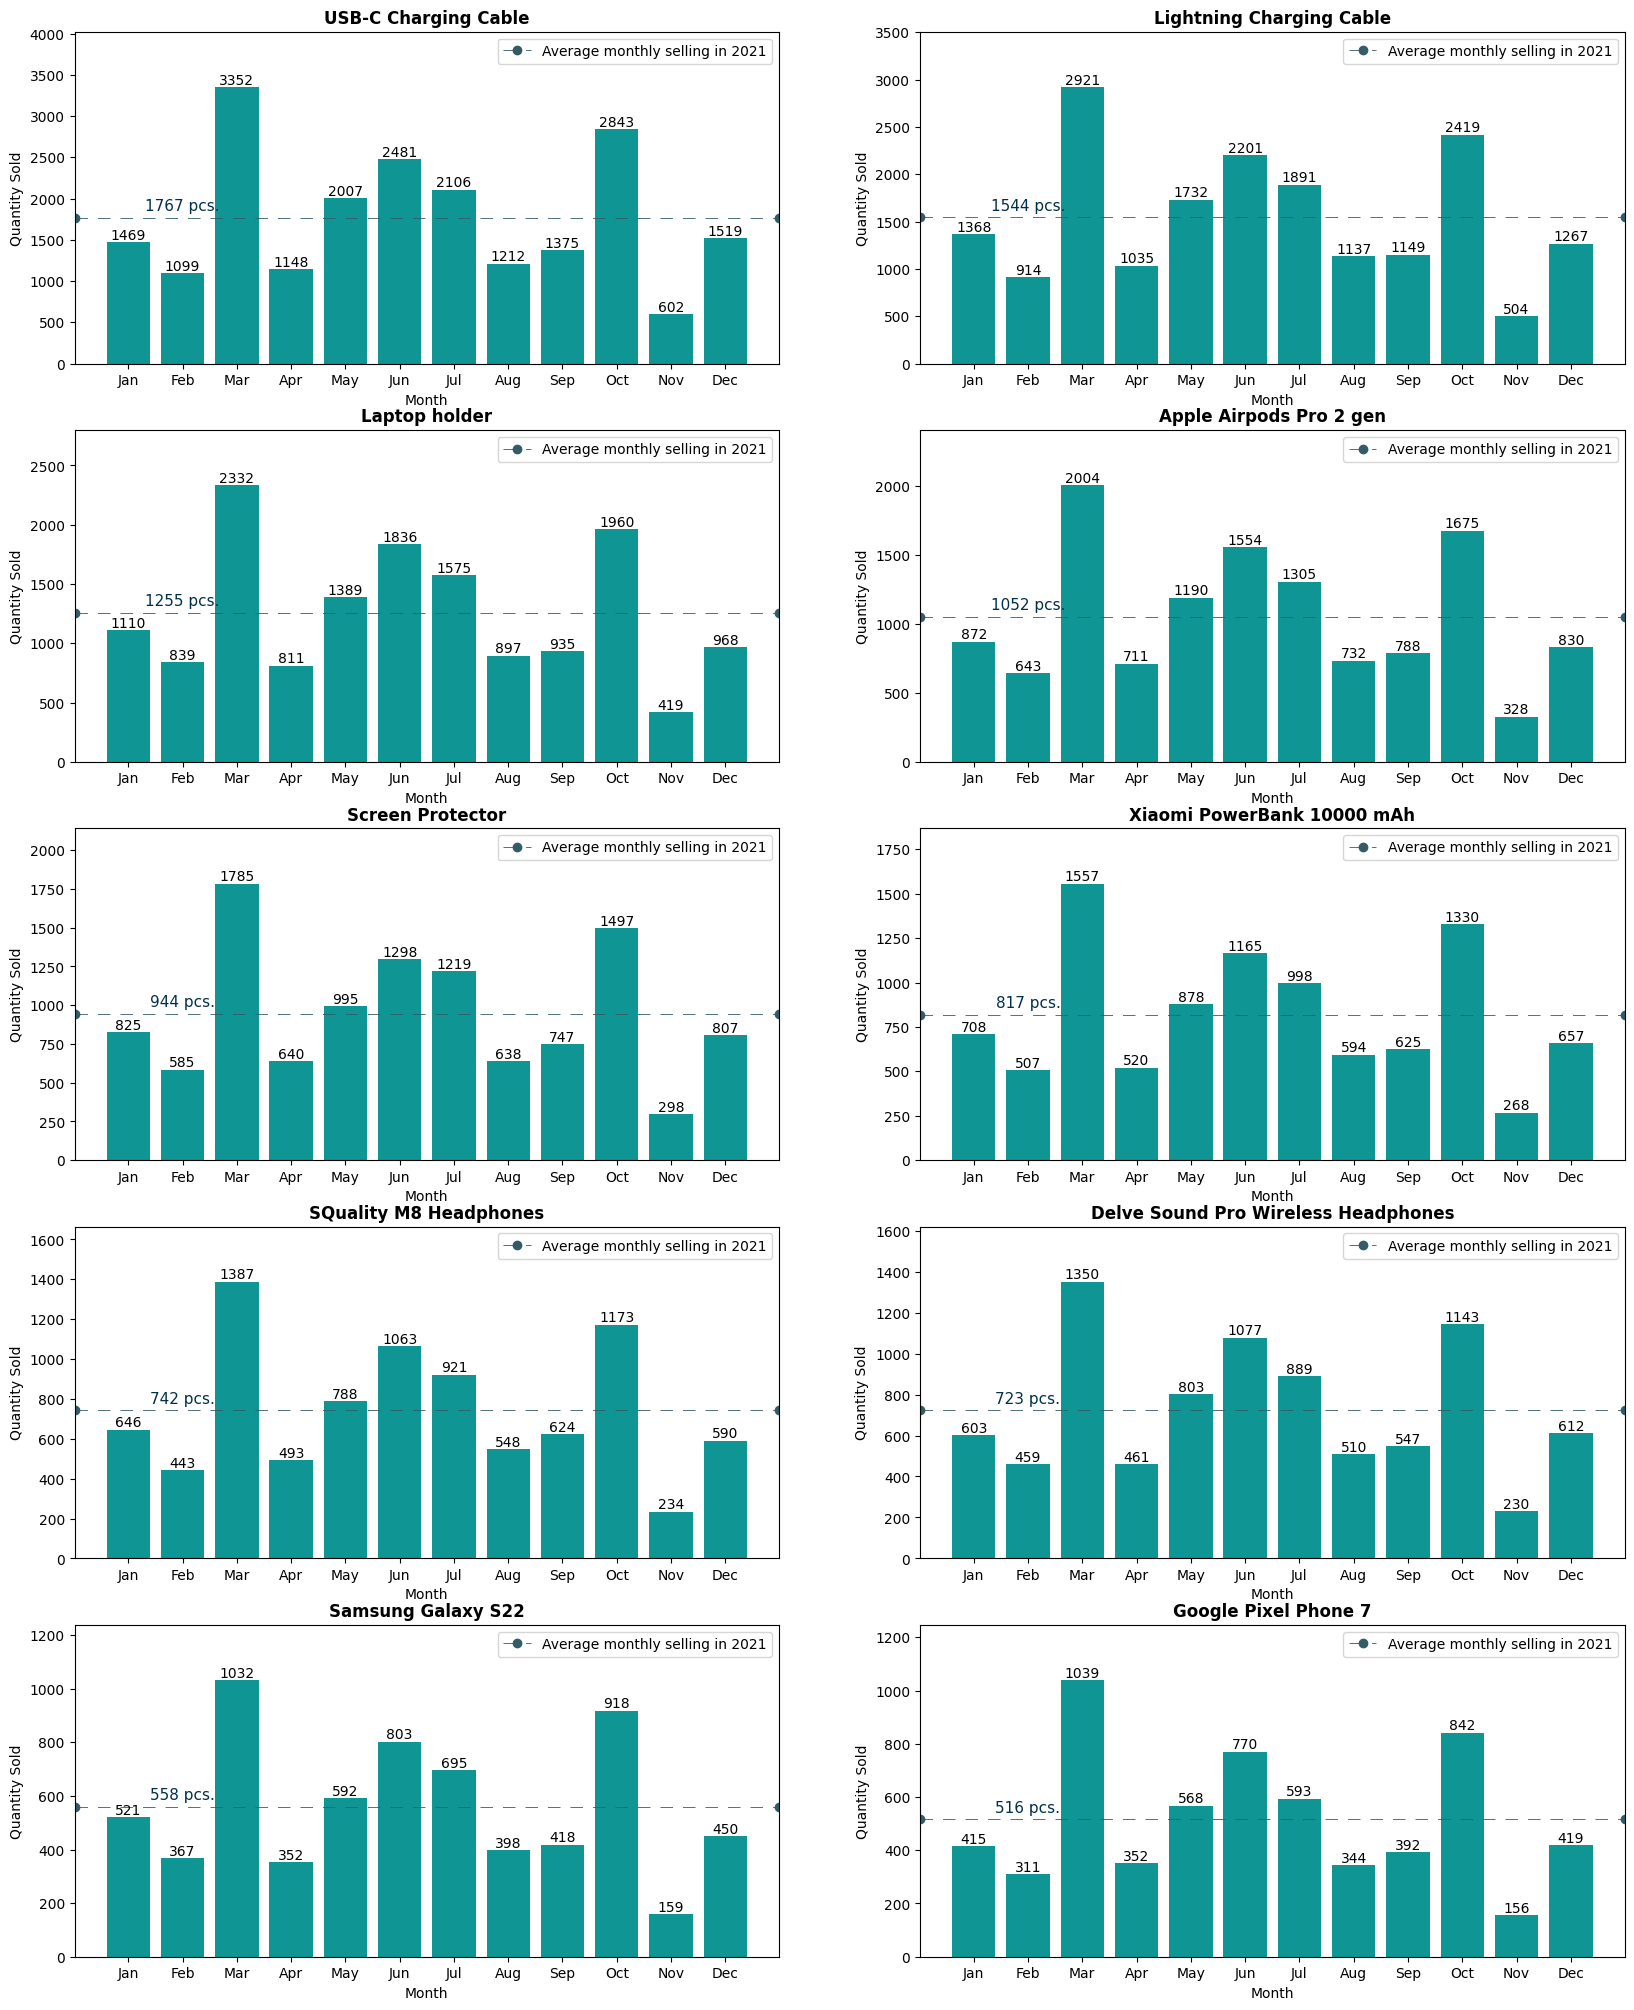

In [40]:

#-- make a function for displaying all products sold in 2021 year separately on axes

def get_distribution(list_of_products:list, seek_value:str='Quantity'):
    """
    The function takes 2 arguments and returns 1 figure with a number of rows defined 
    as half of the length of a list with products (or with anything else).
        list_of_product - a list that contains names of elements that have to be displayed;
        seek_value - numeric values of the elements for displaying (quantity, revenue etc.)
    """

    #-- define the axes and the figure size
    fig, ax = plt.subplots(ncols=2, nrows=len(products)//2, figsize=(20,25))
    x_axis = best_month['Order date'].str[:3]
    x = 0
    
    try:
        for row in range(int(len(products)/2)):
            for col in range(2):
                y_axis = df_2[df_2['Product name'] == d[x]].groupby('Order month').sum().reset_index()
                ax[row,col].bar(x_axis, y_axis[seek_value], color='#0e9594')
                ax[row,col].set_title(f'{d[x]}', weight='bold')
                ax[row,col].set_xlabel('Month')
                ax[row,col].set_ylabel('Quantity Sold')

                # -- labels on the top of the bars 
                for index, data in enumerate(y_axis[seek_value]):
                    ax[row,col].text(index,data, s=data, horizontalalignment='center', verticalalignment='bottom')

                # -- alter the limit of Y axis for better displaying
                ax[row,col].set_ylim([0, y_axis[seek_value].max()*1.2])
                
                # -- calculate average sold amount for each product in the list and add a horizontal line on a chart
                avg_sell = y_axis['Quantity'].sum()//12
                ax[row,col].axhline(avg_sell, color='#335c67', label='Average monthly selling in 2021',\
                linewidth=0.6, marker='o', dashes=(15, 12))

                # -- add an annotation above the horizontal line 
                ax[row,col].annotate(f"{avg_sell} pcs.", color = '#003049', xy=(1, avg_sell*1.05), fontsize=11, ha="center")
                ax[row,col].legend()
                
                # -- increase the step of the 'for loop'
                x += 1
                
    except KeyError:
        print('*****' * 10)
        print('ERROR: Please choose values for displaying from dataset \n(quantity sold items, revenue etc.) as the second argument.\
             \nFor details ---> help(get_distribution).')
        print('*****' * 10)



get_distribution(products, 'Quantity')

Considering that the whole dataset has been generated using the Python script mentioned at the beginning, the distribution of quantity sold by months is based on a set of parameters of the script. As a result, surges and slumps related to quantities of sold products have the same behavior for each individual product, but different from each other in terms of quantity.